# Exercises week 36

## 1:

## 2:

Training: OLS MSE degree =  5 :  3.9793663240256076e-19
Test: OLS MSE degree =  5 :  3.3508737842942777e-19 

Training: RR MSE degree =  5 Lambda =  0.0001 :  9.877998314177312e-09
Test: RR MSE degree =  5 :  0.0001 :  8.053734165465658e-09 

Training: RR MSE degree =  5 Lambda =  0.001 :  3.26720687867144e-07
Test: RR MSE degree =  5 :  0.001 :  4.962353784507909e-06 

Training: RR MSE degree =  5 Lambda =  0.01 :  5.751383863238622e-06
Test: RR MSE degree =  5 :  0.01 :  9.180418155880915e-06 

Training: RR MSE degree =  5 Lambda =  0.1 :  8.037671157125318e-05
Test: RR MSE degree =  5 :  0.1 :  0.00016135067149998866 

Training: RR MSE degree =  5 Lambda =  1.0 :  0.0014245387507702903
Test: RR MSE degree =  5 :  1.0 :  0.0015324624642544561 



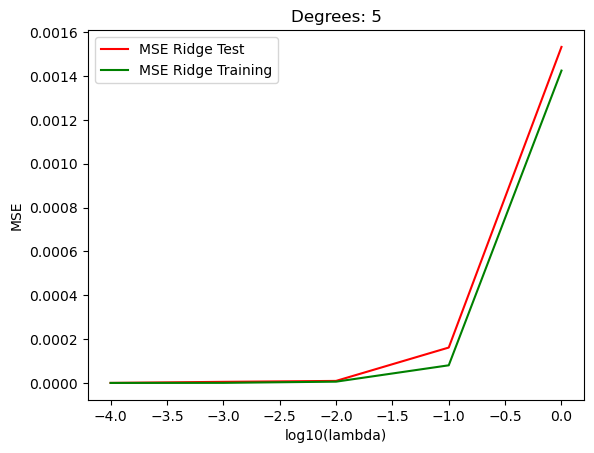

Training: OLS MSE degree =  10 :  0.03585167888745745
Test: OLS MSE degree =  10 :  0.02488520379175025 

Training: RR MSE degree =  10 Lambda =  0.0001 :  2.7026296737251017e-08
Test: RR MSE degree =  10 :  0.0001 :  4.1399448679843e-06 

Training: RR MSE degree =  10 Lambda =  0.001 :  4.654911034596988e-07
Test: RR MSE degree =  10 :  0.001 :  0.001110974991865928 

Training: RR MSE degree =  10 Lambda =  0.01 :  6.416629315069561e-06
Test: RR MSE degree =  10 :  0.01 :  2.4478364773228548e-05 

Training: RR MSE degree =  10 Lambda =  0.1 :  9.099041065211973e-05
Test: RR MSE degree =  10 :  0.1 :  6.282520202059963e-05 

Training: RR MSE degree =  10 Lambda =  1.0 :  0.000845313498676853
Test: RR MSE degree =  10 :  1.0 :  0.002733927908619934 



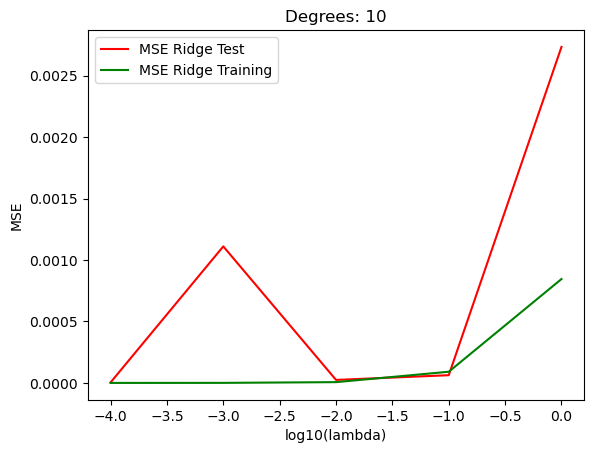

Training: OLS MSE degree =  15 :  7723.7374180350835
Test: OLS MSE degree =  15 :  10672.581952795621 

Training: RR MSE degree =  15 Lambda =  0.0001 :  8.422702852055903e-08
Test: RR MSE degree =  15 :  0.0001 :  0.0002850442521080775 

Training: RR MSE degree =  15 Lambda =  0.001 :  5.170369279634458e-07
Test: RR MSE degree =  15 :  0.001 :  0.00016437238088459595 

Training: RR MSE degree =  15 Lambda =  0.01 :  5.5562331580354175e-06
Test: RR MSE degree =  15 :  0.01 :  0.00601978488956147 

Training: RR MSE degree =  15 Lambda =  0.1 :  8.110140916423007e-05
Test: RR MSE degree =  15 :  0.1 :  0.017336829269996416 

Training: RR MSE degree =  15 Lambda =  1.0 :  0.0009537853113943541
Test: RR MSE degree =  15 :  1.0 :  0.046184728157287 



/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=3.15403e-20): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=3.02266e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=3.15254e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=2.94489e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


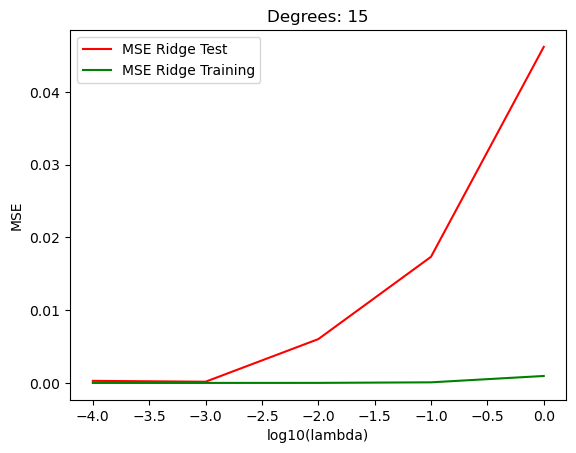

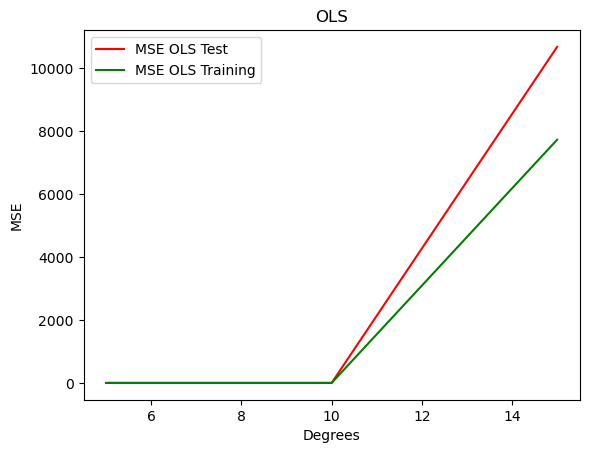

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Make data set
np.random.seed()
n = 100

x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

def CreateFeatureMatrix(degree):
    data_points = np.column_stack((x, y))
    poly = PolynomialFeatures(degree, include_bias=False)

    poly_features = poly.fit_transform(data_points)

    return poly_features

def OrdinaryLeastSquaresMSE(featureMatrix):
    X_train, X_test, y_train, y_test = train_test_split(featureMatrix, y, test_size=0.2)

    beta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    # and then make the prediction
    ytilde = X_train @ beta
    ypredict = X_test @ beta

    mse_training = error.mean_squared_error(y_train, ytilde)
    mse_test = error.mean_squared_error(y_test, ypredict)

    return (mse_training, mse_test)

def RidgeRegressionMSE(featureMatrix, lmb):
    X_train, X_test, y_train, y_test = train_test_split(featureMatrix, y, test_size=0.2)

    #From lecture notes:
    RegRidge = linear_model.Ridge(lmb, fit_intercept=False)
    RegRidge.fit(X_train,y_train)

    ytildeRidge = RegRidge.predict(X_train)
    ypredictRidge = RegRidge.predict(X_test)

    mse_training = error.mean_squared_error(y_train, ytildeRidge)
    mse_test = error.mean_squared_error(y_test, ypredictRidge)

    return (mse_training, mse_test)


degrees = (5, 10, 15)
mses_ols_training = []
mses_ols_test = []
for degree in degrees:
    X = CreateFeatureMatrix(degree)

    #OLS
    ols_mse_training, ols_mse_test = OrdinaryLeastSquaresMSE(X)
    mses_ols_test.append(ols_mse_test)
    mses_ols_training.append(ols_mse_training)

    print("Training: OLS MSE degree = ", degree, ": ", ols_mse_training)
    print("Test: OLS MSE degree = ", degree, ": ", ols_mse_test, "\n")

    #Ridge
    lambdas = (0.0001, 0.001, 0.01, 0.1, 1.0)
    trainingMSEs_ridge = []
    testMSEs_ridge = []
    for lmb in lambdas:
        rr_mse_training, rr_mse_test = RidgeRegressionMSE(X, lmb)
        trainingMSEs_ridge.append(rr_mse_training)
        testMSEs_ridge.append(rr_mse_test)

        print("Training: RR MSE degree = ", degree, "Lambda = ", lmb, ": ", rr_mse_training)
        print("Test: RR MSE degree = ", degree, ": ", lmb, ": ", rr_mse_test, "\n")

    # Ridge plots
    plt.figure()
    plt.title("Degrees: " + str(degree))
    plt.plot(np.log10(lambdas), testMSEs_ridge, 'r', label = 'MSE Ridge Test')
    plt.plot(np.log10(lambdas), trainingMSEs_ridge, 'g', label = 'MSE Ridge Training')

    plt.xlabel('log10(lambda)')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

#OLS plot
plt.figure()
plt.title("OLS")
plt.plot(degrees, mses_ols_test, 'r', label = 'MSE OLS Test')
plt.plot(degrees, mses_ols_training, 'g', label = 'MSE OLS Training')

plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.legend()
plt.show()




The plots show that for higher order polynomials, the ridge regression test model deviates greatly from the training model for high lambdas, while this effect is less noticeable for the lower order polynomial. 

For ordinary least squares, mse blows up for higher order polynomials for both test and training model, but test is worse